# Function 1-Manifold Toy Datasets

> Collections of 1-Manifold toy datasets in 3 dimensional space generated from a function in xy-plane

In [ ]:
# default_exp datasets
# hide
from nbdev.showdoc import *
import numpy as np
import matplotlib.pyplot as plt
import torch
import FlowNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
%load_ext autoreload
%autoreload 2

In [ ]:
# hide
from FlowNet.datasets import plot_directed_2d, plot_directed_3d, xy_tilt, add_noise, generate_prism

We first introduce a helper function that generate a 1-manifold in 3d space given any function $y = f(x)$ and its derivative $y' = f'(x)$.

In [ ]:
# export
def directed_one_variable_function(func, deriv, xlow, xhigh, num_nodes=100, xtilt=0, ytilt=0, sigma=0, inverse=False):
    # positions
    x = np.random.uniform(xlow, xhigh, num_nodes)
    x = np.sort(x)
    y = func(x)
    z = np.zeros(num_nodes)
    X = np.column_stack((x, y, z))
    labels = x
    # vectors
    u = np.ones(num_nodes)
    v = deriv(x)
    w = np.zeros(num_nodes)
    flows = np.column_stack((u, v, w))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels

## Sinh Branch

In [ ]:
# export
def directed_sinh_branch(num_nodes=1000, xscale=1, yscale=1, xtilt=0, ytilt=0, sigma=0, inverse=False):
    num_nodes_per_branch = num_nodes//3
    # root
    X_root, flow_root, labels_root = directed_one_variable_function(
        lambda x: np.sinh(x / xscale) * yscale, 
        lambda x: np.cosh(x / xscale) / xscale * yscale, 
        xlow=-xscale*np.pi*0.84, 
        xhigh=0, 
        num_nodes=num_nodes - 2*num_nodes_per_branch, 
        sigma=sigma
    )
    # branch 1
    X_branch1, flow_branch1, labels_branch1 = directed_one_variable_function(
        lambda x: np.sinh(x / xscale) * yscale, 
        lambda x: np.cosh(x / xscale) / xscale * yscale, 
        xlow=0, 
        xhigh=xscale*np.pi*0.84, 
        num_nodes=num_nodes_per_branch, 
        sigma=sigma
    )
    # branch 2
    X_branch2, flow_branch2, labels_branch2 = directed_one_variable_function(
        lambda x: np.sin(x / xscale) * yscale, 
        lambda x: np.cos(x / xscale) / xscale * yscale, 
        xlow=0, 
        xhigh=xscale*np.pi*2, 
        num_nodes=num_nodes_per_branch, 
        sigma=sigma
    )
    # concatenate
    X = np.concatenate((X_root, X_branch1, X_branch2))
    flows = np.concatenate((flow_root, flow_branch1, flow_branch2))
    labels = np.concatenate((labels_root - np.pi*3, labels_branch1, labels_branch2 + np.pi*3))
    flows = -flows if inverse else flows
    # tilt and add noise
    X, flows = xy_tilt(X, flows, xtilt, ytilt)
    X = add_noise(X, sigma)
    return X, flows, labels


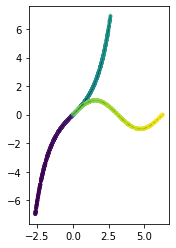

In [ ]:
# collapse
X, flows, labels = directed_sinh_branch()
plot_directed_2d(X, flows, labels)

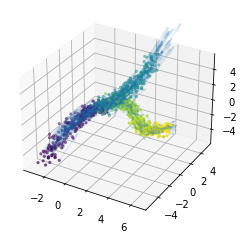

In [ ]:
# collapse
X, flows, labels = directed_sinh_branch(xtilt=np.pi/4, sigma=0.25)
plot_directed_3d(X, flows, labels)

## Sin

In [ ]:
# export
def directed_sin(num_nodes=500, xscale=1, yscale=1, xlow=-2*np.pi, xhigh=2*np.pi, xtilt=0, ytilt=0, sigma=0, inverse=False):
    X, flows, labels = directed_one_variable_function(
        lambda x: np.sin(x / xscale) * yscale, 
        lambda x: np.cos(x / xscale) / xscale * yscale, 
        xlow, xhigh, 
        num_nodes, xtilt, ytilt, sigma, inverse)
    return X, flows, labels

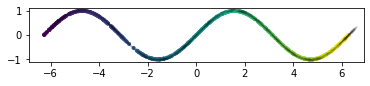

In [ ]:
# collapse
X, flows, labels = directed_sin()
plot_directed_2d(X, flows, labels)

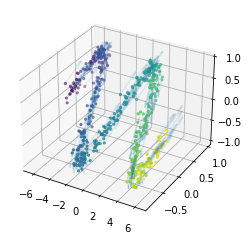

In [ ]:
# collapse
X, flows, labels = directed_sin(xtilt=np.pi/4, sigma=0.1)
plot_directed_3d(X, flows, labels)

## Sin Ribbons

In [ ]:
# export
def directed_sin_ribbon(num_nodes=1000, xscale=1, yscale=1, xlow=-2*np.pi, xhigh=2*np.pi, height=20, xtilt=0, ytilt=0, sigma=0, inverse=False):
    X, flows, labels = directed_sin(num_nodes, xscale, yscale, xlow, xhigh, xtilt, ytilt, sigma, inverse)
    X = generate_prism(num_nodes, X, height)
    return X, flows, labels

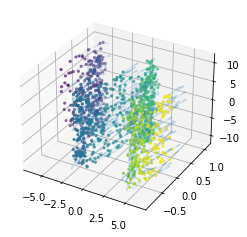

In [ ]:
# collapse
X, flows, labels = directed_sin_ribbon(xtilt=np.pi/4, sigma=0.1)
plot_directed_3d(X, flows, labels)